<a href="https://colab.research.google.com/github/saianil58/Artificial-Neural-Networks/blob/master/Project_%7C_Neural_Networks_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all libraries
import h5py
import numpy
import tensorflow as tf
import tensorflow_datasets as tfds
import os


In [2]:
# import data
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5',mode='r')

In [3]:
# load training and validation data
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [4]:
# close the file
h5f.close()

In [5]:
X_train.shape

(42000, 32, 32)

In [6]:
X_test.shape

(18000, 32, 32)

In [7]:
y_train.max()

9

In [8]:
y_train.min()

0

In [9]:

import plotly.express as px

for x in range(0,10):
    print('Data point number : ',x)
    fig=px.imshow(X_train[x],title='Image for Label as '+str(y_train[x]),width=280,height=280)
    fig.show()

Data point number :  0


Data point number :  1


Data point number :  2


Data point number :  3


Data point number :  4


Data point number :  5


Data point number :  6


Data point number :  7


Data point number :  8


Data point number :  9


In [10]:

#clear previous sessions
tf.keras.backend.clear_session()
# get the sequential model
from tensorflow.keras.models import Sequential
model=Sequential()

In [11]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [12]:

# one hidden layer
model.add(tf.keras.layers.Dense(30,activation='relu'))

In [13]:

#add output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [14]:
#compile model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
# check the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                30750     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 31,060
Trainable params: 31,060
Non-trainable params: 0
_________________________________________________________________


In [16]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)


In [17]:
X_train.shape

(42000, 32, 32)

In [18]:
raw_data_model=model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
1313/1313 [==============================] - 6s 4ms/step - loss: 1947.0330 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 2/20
1313/1313 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 3/20
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3028 - val_accuracy: 0.0982
Epoch 4/20
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 5/20
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 6/20
1313/1313 [==============================] - 5s 4ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.0955
Epoch 7/20
1313/1313 [==============================] - 6s 4ms/step - loss: 2.3027 - accuracy: 0.1018 - val_loss: 2.3027 - val_accura

In [19]:
import pandas as pd
import plotly.graph_objs as go#visualization

def plot_test_vs_train(model, is_loss):
    df = pd.DataFrame(model.history, index=model.epoch)
    if((df.loss[0]-df.loss[1])>100):
        df=df.drop(0)
    holder_string=''
    if is_loss=='Yes':
        holder_string='loss'
    else:
        holder_string='accuracy'
    trace_1 = {
        "mode": "lines+markers",
        "name": "Train "+holder_string,
        "type": "scatter",
        "x": df.index,
        "y": df[holder_string]
      }
    trace_2 = {
      "mode": "lines+markers",
      "name": "Test "+holder_string,
      "type": "scatter",
      "x": df.index,
      "y": df['val_'+holder_string]
    }

    data = [trace_1, trace_2]
    layout = {
      "title": "Training vs Testing Data "+holder_string+" per Epoch",
      "xaxis": {
        "title": "Epoch"
      },
      "yaxis": {
        "title": holder_string
      }
    }
    fig = go.Figure(data = data, layout = layout)
    fig.show() 
def all_models_compare(is_loss,is_train):
    df = pd.DataFrame(raw_data_model.history, index=raw_data_model.epoch)
    if((df.loss[0]-df.loss[1])>100):
        df=df.drop(0)
    holder_string=''
    if is_loss=='Yes':
        holder_string='loss'
    else:
        holder_string='accuracy'
    holder_string1='aaa'
    if is_loss=='Yes':
        holder_string1=''
    else:
        holder_string1='val_'
    trace_1 = {
        "mode": "lines+markers",
        "name": "raw_data_model "+holder_string,
        "type": "scatter",
        "x": df.index, 
        "y":   df[holder_string1+holder_string]
      }
    trace_2 = {
      "mode": "lines+markers",
      "name": "norm_model "+holder_string,
      "type": "scatter",
      "x": norm_model.epoch,
      "y": norm_model.history[holder_string1+holder_string]
    }
    trace_3 = {
      "mode": "lines+markers",
      "name": "lr_model "+holder_string,
      "type": "scatter",
      "x": lr_model.epoch,
      "y": lr_model.history[holder_string1+holder_string]
    }
    trace_4 = {
      "mode": "lines+markers",
      "name": "deep_model "+holder_string,
      "type": "scatter",
      "x": deep_model.epoch,
      "y": deep_model.history[holder_string1+holder_string]
    }
    if is_train=='Yes':
        holder_string1='Train'
    else:
        holder_string1='Validation'

    data = [trace_1, trace_2,trace_3,trace_4]
    layout = {
      "title": holder_string1+" "+holder_string+" per Epoch per model",
      "xaxis": {
        "title": "Epoch"
      },
      "yaxis": {
        "title": holder_string
      }
    }
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [20]:
### Plot the loss in train and validation
plot_test_vs_train(raw_data_model,'Yes')

In [21]:

### Plot the loss in train and validation
plot_test_vs_train(raw_data_model,'No')

The above results are not satifisfactory. Can you guess what went wrong?

The data is passed into the network is not Normalized. Normalization is a step where we will bring all features to the same scale and this is important in case of images as pixels with higher values might dominate the results


In [22]:
#clear previous sessions
tf.keras.backend.clear_session()
# get the sequential model
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
#Batch Normalization layer
model.add(tf.keras.layers.BatchNormalization())
# one hidden layer
model.add(tf.keras.layers.Dense(30,activation='relu'))
#add output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))
#compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )

In [23]:
norm_model=model.fit(x=X_train,y=y_train,epochs=20,batch_size=4000,validation_data=(X_test,y_test),verbose=1)

Epoch 1/20
11/11 [==============================] - 0s 31ms/step - loss: 2.5422 - accuracy: 0.1175 - val_loss: 3.6401 - val_accuracy: 0.1138
Epoch 2/20
11/11 [==============================] - 0s 19ms/step - loss: 2.2414 - accuracy: 0.1883 - val_loss: 2.5086 - val_accuracy: 0.1950
Epoch 3/20
11/11 [==============================] - 0s 18ms/step - loss: 2.0394 - accuracy: 0.2960 - val_loss: 2.0205 - val_accuracy: 0.3296
Epoch 4/20
11/11 [==============================] - 0s 20ms/step - loss: 1.8554 - accuracy: 0.4036 - val_loss: 1.7849 - val_accuracy: 0.4050
Epoch 5/20
11/11 [==============================] - 0s 20ms/step - loss: 1.6940 - accuracy: 0.4869 - val_loss: 1.5592 - val_accuracy: 0.5089
Epoch 6/20
11/11 [==============================] - 0s 18ms/step - loss: 1.5612 - accuracy: 0.5463 - val_loss: 1.4476 - val_accuracy: 0.5564
Epoch 7/20
11/11 [==============================] - 0s 19ms/step - loss: 1.4600 - accuracy: 0.5793 - val_loss: 1.3775 - val_accuracy: 0.5799
Epoch 8/20
11

In [24]:
### Plot the loss in train and validation
plot_test_vs_train(norm_model,'Yes')

In [25]:

### Plot the loss in train and validation
plot_test_vs_train(norm_model,'No')

In [26]:
pip install git+https://github.com/autonomio/talos@1.0

  Cloning https://github.com/autonomio/talos (to revision 1.0) to /tmp/pip-req-build-nf8zgcfv
  Running command git clone -q https://github.com/autonomio/talos /tmp/pip-req-build-nf8zgcfv
  Running command git checkout -b 1.0 --track origin/1.0
  Switched to a new branch '1.0'
  Branch '1.0' set up to track remote branch '1.0' from 'origin'.
     |████████████████████████████████| 8.7MB 2.8MB/s 
     |████████████████████████████████| 839kB 23.2MB/s 
  Created wheel for talos: filename=talos-1.0-cp36-none-any.whl size=53700 sha256=f0170b61d2d54c80614d47d84be99b40320c0fae034061f4e5f5b48a567680ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-ud63t25u/wheels/9f/14/d1/e58012a97c43cf2148959890b171f49e4a5e1c82a9946b2c22
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=ca63c71f397b6c10720f9306d7e3b89019c50dea46d669b94a9c91bfad6273ed
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wh

In [35]:
# first import things as you would usually
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import categorical_crossentropy, logcosh
from tensorflow.keras.activations import relu, elu, softmax

# import talos
import talos


# then define the parameter boundaries
p = {'lr': (2, 10, 30),
     'first_neuron': [32, 64, 128,256],
     'hidden_layers': [1,2, 3, 4, 5, 6],
     'batch_size': [3000,4000,5000],
     'epochs': [10],
     'dropout': (0, 0.40, 10),
     'weight_regulizer': [None],
     'emb_output_dims': [None],
     'optimizer': ['adam', 'nadam'],
     'losses': [categorical_crossentropy, logcosh],
     'activation': [relu, elu],
     'last_activation': [softmax]}


# then define your Keras model
def iris_model(x_train, y_train, x_val, y_val, params):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
    #Batch Normalization layer
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['activation']))
    model.add(Dropout(params['dropout']))
    model.add(Dense(y_train.shape[1], activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'],
                      loss=params['losses'], metrics=['acc'])
    out = model.fit(x_train,
                        y_train,
                        callbacks=[talos.utils.ExperimentLogCallback('first_test', params)],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        validation_data=(x_val, y_val),
                        verbose=0)
    return out,model

# and run the scan
h = talos.Scan(X_train, y_train,
              params=p,
               experiment_name='first_test',
               x_val=X_test,y_val=y_test,
               model=iris_model,
               fraction_limit=0.001)





  0%|          | 0/46 [00:00<?, ?it/s]



  2%|▏         | 1/46 [00:03<02:35,  3.45s/it]



  4%|▍         | 2/46 [00:06<02:29,  3.40s/it]



  7%|▋         | 3/46 [00:09<02:20,  3.26s/it]



  9%|▊         | 4/46 [00:12<02:12,  3.16s/it]



 11%|█         | 5/46 [00:15<02:08,  3.14s/it]



 13%|█▎        | 6/46 [00:18<02:02,  3.06s/it]



 15%|█▌        | 7/46 [00:22<02:05,  3.21s/it]



 17%|█▋        | 8/46 [00:24<01:55,  3.03s/it]



 20%|█▉        | 9/46 [00:27<01:47,  2.91s/it]



 22%|██▏       | 10/46 [00:30<01:48,  3.02s/it]



 24%|██▍       | 11/46 [00:33<01:47,  3.07s/it]



 26%|██▌       | 12/46 [00:36<01:44,  3.06s/it]



 28%|██▊       | 13/46 [00:39<01:38,  3.00s/it]



 30%|███       | 14/46 [00:42<01:33,  2.94s/it]



 33%|███▎      | 15/46 [00:45<01:32,  2.97s/it]



 35%|███▍      | 16/46 [00:48<01:33,  3.10s/it]



 37%|███▋      | 17/46 [00:52<01:33,  3.23s/it]



 39%|███▉      | 18/46 [00:55<01:32,  3.31s/it]



 41%|████▏     | 19/46 [00:59<01:31,  3.38s/i

In [37]:
analyze_object = talos.Analyze(h)

In [38]:
# get the highest result for any metric
analyze_object.high('val_acc')

0.7698888778686523

In [39]:
# get the best paramaters
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'])

array([[3, <function logcosh at 0x7ffa4509aa60>, 0.2, 'adam', 256, 10,
        <function relu at 0x7ffa44e182f0>,
        <function softmax at 0x7ffa44df4f28>, '07/05/20-080646',
        2.697981834411621, None, 3000, None, 10, 6, '07/05/20-080644', 0],
       [3, <function categorical_crossentropy at 0x7ffa4509aae8>, 0.12,
        'adam', 256, 10, <function relu at 0x7ffa44e182f0>,
        <function softmax at 0x7ffa44df4f28>, '07/05/20-080434',
        2.712582588195801, None, 3000, None, 10, 2, '07/05/20-080431', 1],
       [5, <function categorical_crossentropy at 0x7ffa4509aae8>, 0.28,
        'nadam', 256, 10, <function relu at 0x7ffa44e182f0>,
        <function softmax at 0x7ffa44df4f28>, '07/05/20-080544',
        3.1822450160980225, None, 3000, None, 10, 2, '07/05/20-080541',
        2],
       [1, <function categorical_crossentropy at 0x7ffa4509aae8>, 0.16,
        'adam', 64, 10, <function relu at 0x7ffa44e182f0>,
        <function softmax at 0x7ffa44df4f28>, '07/05/20-08050

In [40]:
# get correlation for hyperparameters against a metric
analyze_object.correlate('val_loss', ['acc', 'loss', 'val_loss'])

duration         0.332905
round_epochs          NaN
val_acc         -0.018230
batch_size       0.099138
dropout          0.257815
epochs                NaN
first_neuron    -0.005449
hidden_layers    0.159586
lr               0.012166
Name: val_loss, dtype: float64

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


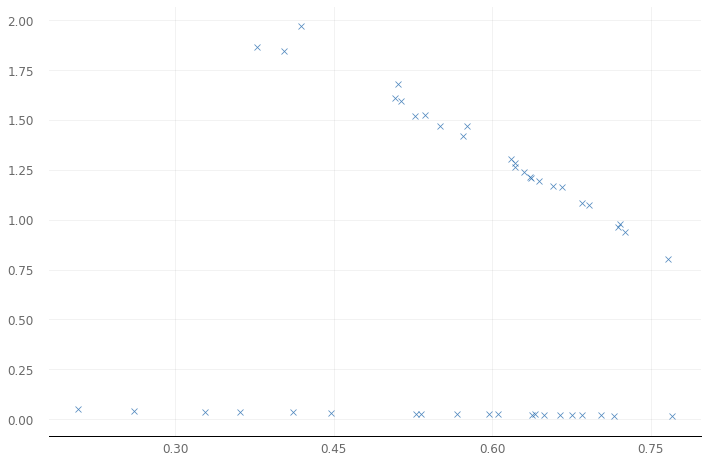

In [41]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_acc', 'val_loss')

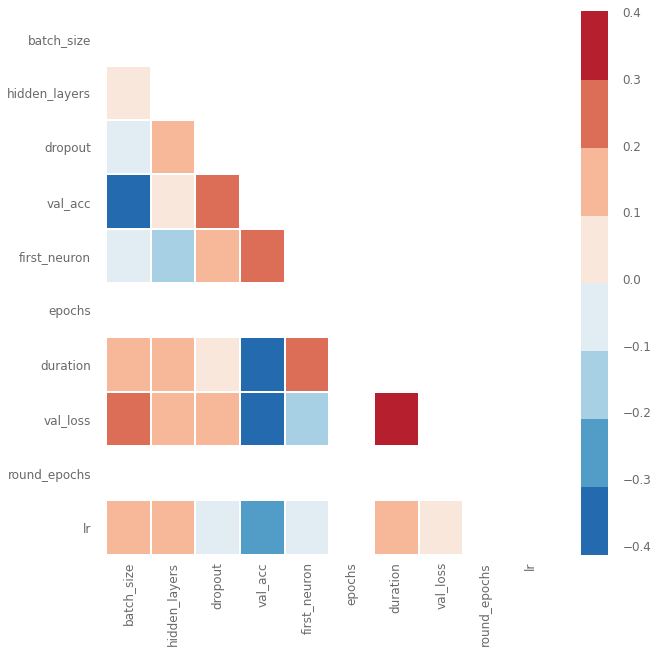

In [42]:
# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

In [45]:
evaluate_object = talos.Evaluate(h)
evaluate_object.evaluate(X_train, y_train, folds=10, metric='val_acc', task='multi_label')

[0.7924705868749081,
 0.7906780629894643,
 0.787262452743018,
 0.7765192640344998,
 0.7874186927213114,
 0.7833023000355023,
 0.7834677035237483,
 0.7872691636076455,
 0.7867528494219718,
 0.7881656133790114]